In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import os
print(os.listdir())

['eye-state (1).ipynb', 'test_data']


In [4]:
print("test")
data = pd.read_csv('test_data/EEG_Eye_State_Classification.csv')

test


In [5]:
data.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0


In [7]:
type(data)

pandas.core.frame.DataFrame

In [8]:
data.describe()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
count,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000
mean,4321.917777,4009.767694,4264.022433,4164.946326,4341.741075,4644.022379,4110.400160,4616.056904,4218.826610,4231.316200,4202.456900,4279.232774,4615.205336,4416.435832,0.448798
std,2492.072174,45.941672,44.428052,5216.404632,34.738821,2924.789537,4600.926543,29.292603,2136.408523,38.050903,37.785981,41.544312,1208.369958,5891.285043,0.497388
min,1030.770000,2830.770000,1040.000000,2453.330000,2089.740000,2768.210000,2086.150000,4567.180000,1357.950000,1816.410000,3273.330000,2257.950000,86.666700,1366.150000,0.000000
25%,4280.510000,3990.770000,4250.260000,4108.210000,4331.790000,4611.790000,4057.950000,4604.620000,4190.770000,4220.510000,4190.260000,4267.690000,4590.770000,4342.050000,0.000000
50%,4294.360000,4005.640000,4262.560000,4120.510000,4338.970000,4617.950000,4070.260000,4613.330000,4199.490000,4229.230000,4200.510000,4276.920000,4603.080000,4354.870000,0.000000
75%,4311.790000,4023.080000,4270.770000,4132.310000,4347.180000,4626.670000,4083.590000,4624.100000,4209.230000,4239.490000,4211.280000,4287.180000,4617.440000,4372.820000,1.000000
max,309231.000000,7804.620000,6880.510000,642564.000000,6474.360000,362564.000000,567179.000000,7264.100000,265641.000000,6674.360000,6823.080000,7002.560000,152308.000000,715897.000000,1.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14980 entries, 0 to 14979
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AF3           14980 non-null  float64
 1   F7            14980 non-null  float64
 2   F3            14980 non-null  float64
 3   FC5           14980 non-null  float64
 4   T7            14980 non-null  float64
 5   P7            14980 non-null  float64
 6   O1            14980 non-null  float64
 7   O2            14980 non-null  float64
 8   P8            14980 non-null  float64
 9   T8            14980 non-null  float64
 10  FC6           14980 non-null  float64
 11  F4            14980 non-null  float64
 12  F8            14980 non-null  float64
 13  AF4           14980 non-null  float64
 14  eyeDetection  14980 non-null  int64  
dtypes: float64(14), int64(1)
memory usage: 1.7 MB


In [10]:
data = data.drop(columns =
               ["AF3", "T7","P8","T8", "P7", "O1", "O2", "AF4", "F3", "FC6", "F4", "FC5", "F7"])

In [11]:
data.head()

,F8,eyeDetection
0,4635.90,0
1,4632.82,0
2,4628.72,0
3,4632.31,0
4,4632.82,0


In [7]:
import numpy as np
import pandas as pd

def remove_outliers_zscore_df(df, threshold=3):
    cleaned_df = df.copy()
    
    for column in cleaned_df.select_dtypes(include=[np.number]).columns:  # Process only numeric columns
        mean = cleaned_df[column].mean()
        std = cleaned_df[column].std()
        
        z_scores = (cleaned_df[column] - mean) / std
        outliers = np.abs(z_scores) > 3
        
        median_value = cleaned_df[column].median()
        cleaned_df.loc[outliers, column] = median_value  # Replace outliers with median
        
    return cleaned_df

In [266]:
data_numpy = np.array(data)
data.shape

(14980, 7)

No handles with labels found to put in legend.


Index(['F8', 'eyeDetection'], dtype='object')


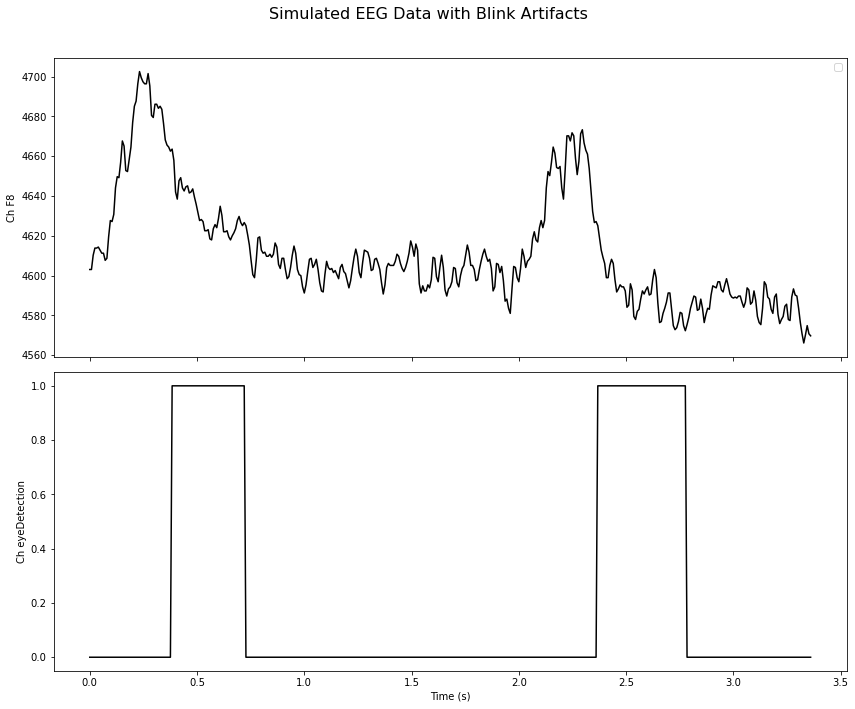

In [16]:
import matplotlib.pyplot as plt

# Generate synthetic EEG-like data
np.random.seed(42)
n_channels = 2


# Plotting
fig, axes = plt.subplots(n_channels, 1, figsize=(12, 10), sharex=True)
cleaned_data = remove_outliers_zscore_df(data, 3)
#cleaned_data = cleaned_data.loc[12680: 13100]
#cleaned_data = cleaned_data.loc[3000: 6500]

for i, vals in enumerate(cleaned_data["F8"]):
    if vals < 4000:
        cleaned_data.loc[i, "F8"] = np.mean(cleaned_data["F8"])    
print(data.columns)
for i, col in enumerate(data.columns):
    
    
    axes[i].plot([i/125 for i in range(len(cleaned_data[col]))], cleaned_data[col], color='black')
    axes[i].set_ylabel(f'Ch {col}')
    axes[i].legend(loc='upper right') if i == 0 else None

axes[-1].set_xlabel('Time (s)')
#plt.xticks(np.arange(0, len(cleaned_data)/125, 1))  # From 0 to 10 in 0.2 increments

plt.suptitle('Simulated EEG Data with Blink Artifacts', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [13]:
def moving_average_derivative(signal, window_size=5):
    """
    Compute the smoothed derivative using a moving window.
    The derivative at each point is computed as the difference between the averages
    of two adjacent windows.
    """
    smoothed_derivative = np.zeros_like(signal)
    
    for i in range(window_size, len(signal) - window_size):
        # Average of the previous window
        prev_avg = np.mean(signal[i - window_size:i])
        
        # Average of the next window
        next_avg = np.mean(signal[i:i + window_size])
        
        # Derivative as the difference between these averages
        smoothed_derivative[i] = (next_avg - prev_avg) / window_size
        
    return smoothed_derivative

In [14]:
import scipy.signal as signal

def detect_blinks_with_smooth_derivative(eeg_signal, sampling_rate, k=1.5, window_size=10):
    # 1. Preprocessing: Apply a low-pass filter to remove high-frequency noise
    nyquist_freq = 0.5 * sampling_rate
    cutoff_freq = 5.0  # Blinks are low-frequency events (below ~5 Hz)
    normal_cutoff = cutoff_freq / nyquist_freq
    b, a = signal.butter(2, normal_cutoff, btype='low', analog=False)
    filtered_signal = signal.filtfilt(b, a, eeg_signal)
    
    # 2. Detect Positive Peaks (start of blink)
    mean_signal = np.mean(filtered_signal)
    std_dev_signal = np.std(filtered_signal)
    pos_thresh = mean_signal + k * std_dev_signal
    
    pos_peaks, _ = signal.find_peaks(filtered_signal, height=pos_thresh)
    
    # 3. Compute the smoothed derivative
    smoothed_derivative = moving_average_derivative(filtered_signal, window_size=window_size)
    
    # 4. Determine threshold for blink end based on derivative's standard deviation
    derivative_std = np.std(smoothed_derivative)
    derivative_thresh = derivative_std * 0.5  # Blink ends when derivative is below this
    
    # 5. Detect Blink Periods
    blink_periods = []
    
    for peak in pos_peaks:
        blink_end = peak
        for i in range(peak + 1, len(smoothed_derivative)):
            # If the smoothed derivative drops below threshold, mark as blink end
            if abs(smoothed_derivative[i]) < derivative_thresh:
                blink_end = i
                break
        
        blink_periods.append((peak, blink_end))

    return blink_periods, filtered_signal, pos_peaks, smoothed_derivative, derivative_thresh

In [15]:
def detect_blinks_with_sustained_derivative(eeg_signal, sampling_rate, k, window_size, sustain_duration):
    # 1. Preprocessing: Low-pass filter to remove high-frequency noise
    nyquist_freq = 0.5 * sampling_rate
    cutoff_freq = 5.0  # Blinks are low-frequency events
    normal_cutoff = cutoff_freq / nyquist_freq
    b, a = signal.butter(2, normal_cutoff, btype='low', analog=False)
    filtered_signal = signal.filtfilt(b, a, eeg_signal)
    
    # 2. Detect Positive Peaks (start of blink)
    mean_signal = np.mean(filtered_signal)
    std_dev_signal = np.std(filtered_signal)
    pos_thresh = mean_signal + k * std_dev_signal
    pos_peaks, _ = signal.find_peaks(filtered_signal, height=pos_thresh)
    
    # 3. Compute the smoothed derivative
    smoothed_derivative = moving_average_derivative(filtered_signal, window_size=window_size)
    
    # 4. Derivative bounds for blink end detection
    derivative_std = np.std(smoothed_derivative)
    lower_bound = -0.5 * derivative_std
    upper_bound = 0.5 * derivative_std
    
    # Convert sustain_duration from seconds to samples
    sustain_samples = int(sustain_duration * sampling_rate)
    
    # 5. Detect Blink Periods
    blink_periods = []
    
    for peak in pos_peaks:
        blink_end = peak
        for i in range(peak + 1, len(smoothed_derivative) - sustain_samples):
            # Check if derivative remains within bounds for the sustain window
            window = smoothed_derivative[i:i + sustain_samples]
            if np.all((window > lower_bound) & (window < upper_bound)):
                blink_end = i + sustain_samples
                break
        
        blink_periods.append((peak, blink_end))

    return blink_periods, filtered_signal, pos_peaks, smoothed_derivative, lower_bound, upper_bound

In [16]:

import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

def detect_blinks_statistical(eeg_signal, sampling_rate, k=1.5):
    
    # 1. Preprocessing: Apply a low-pass filter to remove high-frequency noise
    nyquist_freq = 0.5 * sampling_rate
    cutoff_freq = 5.0  # Blinks are low-frequency events (below ~5 Hz)
    normal_cutoff = cutoff_freq / nyquist_freq
    b, a = signal.butter(2, normal_cutoff, btype='low', analog=False)
    filtered_signal = signal.filtfilt(b, a, eeg_signal)
    
    # 2. Compute mean and standard deviation
    mean_signal = np.mean(filtered_signal)
    std_dev_signal = np.std(filtered_signal)
    
    # 3. Dynamic thresholds based on standard deviation
    pos_thresh = mean_signal + k * std_dev_signal  # Positive peak threshold
    neg_thresh = mean_signal - k * std_dev_signal  # Negative peak threshold
    
    # 4. Detect positive peaks (start of blink)
    pos_peaks, _ = signal.find_peaks(filtered_signal, height=pos_thresh)
    
    # 5. Detect negative peaks (end of blink)
    neg_peaks, _ = signal.find_peaks(-filtered_signal, height=-neg_thresh)

    # 6. Pair positive and negative peaks to classify blink periods
    blink_periods = []
    neg_idx = 0  # Index to track the negative peaks
    
    for pos_peak in pos_peaks:
        # Find the first negative peak that occurs after the positive peak
        while neg_idx < len(neg_peaks) and neg_peaks[neg_idx] < pos_peak:
            neg_idx += 1
        
        if neg_idx < len(neg_peaks):
            neg_peak = neg_peaks[neg_idx]
            blink_periods.append((pos_peak, neg_peak))  # Store the blink period
            neg_idx += 1  # Move to the next negative peak

    return blink_periods, filtered_signal, pos_peaks, neg_peaks, pos_thresh, neg_thresh

In [17]:
def moving_average(signal, window_size=5):
    """Smooth the signal using a simple moving average."""
    return np.convolve(signal, np.ones(window_size)/window_size, mode='same')

In [18]:
def ave_signals(cleaned_data, cols):
    ave_col = np.zeros(len(cleaned_data))
    for i in range(len(cleaned_data)):
        for col in cols:
            ave_col[i] += cleaned_data.loc[i, col]
    ave_col = ave_col / len(cols)
    cleaned_data["averaged_signal"] = ave_col
    return cleaned_data

In [274]:
#cleaned_data = ave_signals(cleaned_data, ["FC6", "F8", "F4"])
#cleaned_data["F8"] = moving_average(cleaned_data["F8"], 10)

In [275]:
#plt.plot(cleaned_data["F8"])
#plt.show

In [19]:
blink_periods, filtered_signal, pos_peaks, neg_peaks, pos_thresh, neg_thresh = detect_blinks_statistical(cleaned_data["F8"], 128, 1.4)

In [38]:
blink_periods, filtered_signal, pos_peaks, smoothed_derivative, lower_bound, upper_bound = detect_blinks_with_sustained_derivative(eeg_signal =cleaned_data["F8"], sampling_rate=125, k=1.5, window_size=5, sustain_duration=0.1)


In [278]:
#plt.plot(smoothed_derivative)
#plt.show

In [39]:
blink_periods

[(33, 81), (282, 326)]

In [40]:
val_mat = np.zeros(len(cleaned_data))
for period in blink_periods:
    val_mat[period[0]: period[1]] = 1
    


In [41]:
correct = 0
for val, act in zip(val_mat, np.array(cleaned_data["eyeDetection"])):
    if val == act:
        correct += 1
print(correct/len(val_mat))

0.8551068883610451


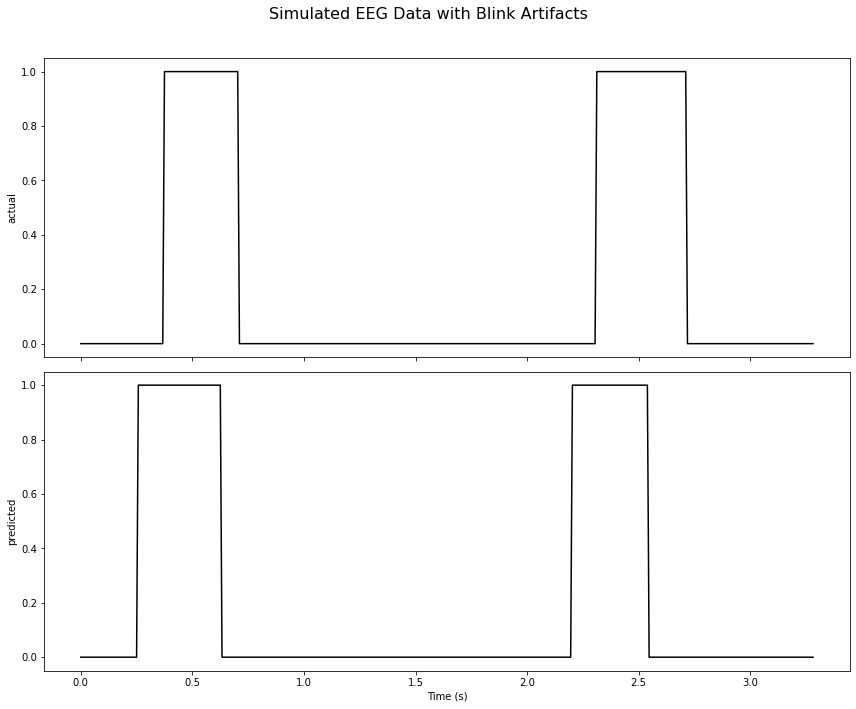

In [42]:
n_channels = 2


# Plotting
fig, axes = plt.subplots(n_channels, 1, figsize=(12, 10), sharex=True)
    
axes[0].plot([i/128 for i in range(len(val_mat))], cleaned_data["eyeDetection"], color='black')
axes[0].set_ylabel(f'actual')
axes[0].legend(loc='upper right') if i == 0 else None

axes[1].plot([i/128 for i in range(len(val_mat))], val_mat, color='black')
axes[1].set_ylabel(f'predicted')
axes[1].legend(loc='upper right') if i == 0 else None

axes[-1].set_xlabel('Time (s)')
plt.suptitle('Simulated EEG Data with Blink Artifacts', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()